In [1]:
# Import packages
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Import local modules
import datasets

In [2]:
# Read in the ASU dataset
_, Y_asu, _, names_asu = datasets.read_dan_data(sol_limit=1378)
names_asu = [name.split('_')[1] for name in names_asu]

In [3]:
# Some of the IKI clusters are wrong and we need to manually remove them
ignore = [30888, 430000, 522668, 531990, 532980, 530000]

# Group ASU data by odometry
odom_asu = {}
odom_asu_sols = {}
for i, name in enumerate(names_asu):
    odom = int(name.split('EAC')[-1][4:])
    sol = int(name.split('EAC')[-1][:4])
    if odom in ignore:
        continue
    if odom not in odom_asu.keys():
        odom_asu[odom] = []
        odom_asu_sols[odom] = []
    odom_asu[odom].append(Y_asu[i,0])
    odom_asu_sols[odom].append(sol)
print len(odom_asu.keys())

weh_asu = []
for o in sorted(odom_asu.keys()):
    weh_asu.append(np.mean(odom_asu[o]))

523


In [4]:
# Read in the IKI dataset
weh_iki = []
with open('/Users/hannahrae/data/dan/DAN_IKI_sol1-1378.csv', 'rU') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if 'Site' in row[0] or row[0] == '' or row[0] == '0':
            continue
        site, sol, odom, single_h2o, single_h2o_err, single_cl, single_cl_err, single_p, top_h2o, top_err, depth, depth_err, bottom_h2o, bottom_err, double_cl, double_cl_err, double_h2o, double_h2o_err, grad, grad_err, double_p, png_power = row
        weh_iki.append(float(single_h2o))

print len(weh_iki)

523


0.8763797866484613
(0.7590211124930125, 3.6398826708984245e-99)


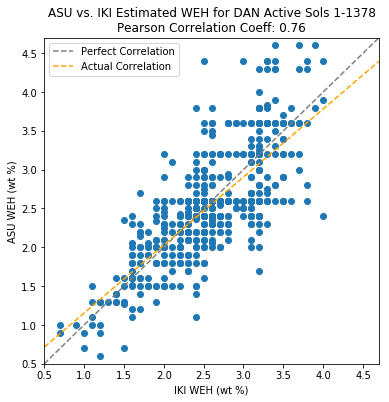

In [22]:
fig, ax = plt.subplots(1, figsize=(6,6))
plt.scatter(weh_iki, weh_asu)
plt.plot([0.5, 4.7], [0.5, 4.7], linestyle='--', color='grey', label='Perfect Correlation')
fit = np.polyfit(weh_iki, weh_asu, 1)
x = np.linspace(0.5, 4.7, 100)
plt.plot(x, fit[0]*x + fit[1], linestyle='--', color='orange', label='Actual Correlation')
print fit[0]

plt.title("ASU vs. IKI Estimated WEH for DAN Active Sols 1-1378\nPearson Correlation Coeff: 0.76")
plt.xlabel("IKI WEH (wt %)")
plt.ylabel("ASU WEH (wt %)")
plt.xlim(0.5, 4.7)
plt.ylim(0.5, 4.7)
plt.legend()

print pearsonr(weh_iki, weh_asu)
plt.savefig('/Users/hannahrae/data/dan/iki_vs_asu_weh.pdf')

# color these by p value?

In [ ]:
sols_asu = [int(fname.split('EAC')[-1][:4]) for fname in names_asu]
len(sols_asu)

In [ ]:
sols = []
iki_weh = []
asu_weh = []

for name in names_overlap:
    sols.append(int(name.split('EAC')[-1][:4]))
    y_iki = Y_iki[np.where(np.array(names_iki)==name)][0]
    iki_weh.append(y_iki[0])
    y_asu = Y_asu[np.where(np.array(names_asu)==name)][0]
    asu_weh.append(y_asu[0])

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,5))
plt.scatter(iki_weh, asu_weh)
plt.title("ASU vs. IKI Estimated WEH for DAN Active Sols 1-1378")
plt.xlabel("IKI WEH (wt %)")
plt.ylabel("ASU WEH (wt %)")
plt.savefig('/Users/hannahrae/data/dan/iki_vs_asu_weh.pdf')